# Mistborn eyebrow data analysis
A brief analysis of characters in Brandon Sanderson's _Mistborn_ series based off the number of times each character "raises an eyebrow" at another.

* Q1: Which characters raise their eyebrows the most?
* Q2: How do characters' eyebrow interaction trends look over time?
* Q3: What can we infer about the social dynamics that govern the established and developing relationships between characters based on their eyebrow exchanges?

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import defaultdict, Counter

## Load eyebrow  interaction data

In [2]:
df = pd.read_csv('mistborn-eyebrow.txt', sep='\t')
df.head(10)

,page,source,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1
5,55,kelsier,vin,1
6,55,kelsier,vin,1
7,56,kelsier,vin,1
8,58,kelsier,vin,1
9,67,breeze,ham,1


* "source" = character who initiated the eyebrow raise
* "target"    = character who received the eyebrow raise

## Group interactions by book

In [3]:
dfg = df.groupby("book")

# final empire
fe = dfg.get_group(1)
print("Final Empire count:", fe.shape[0])

# well of ascension
wa = dfg.get_group(2)
print("Well of Ascension count:", wa.shape[0])

# hero of ages 
ha = dfg.get_group(3)
print("Hero of ages count:", ha.shape[0])

Final Empire count: 53
Well of Ascension count: 48
Hero of ages count: 42


## Q1: Which characters raise their eyebrows the most?

### Build df counting how often characters are eyebrow "raisers" vs "raisees"

In [4]:
def get_raiser_raisee_count_df(book_df):
    '''
    Given a particular book df (all books or just one), calculate the 
    number of eyebrow raiser and raisee interactions for all characters
    '''
    
    raisers = defaultdict(int,book_df.source.value_counts())

    raisees = defaultdict(int,book_df.target.value_counts())

    all_chars = set(list(raisers.keys()) + list(raisees.keys()))
    all_chars

    # build raiser/raisee count df
    data = [(x, raisers[x], raisees[x]) for x in all_chars]
    raise_df = pd.DataFrame(data, columns=['character','raiser','raisee']).sort_values("raiser",ascending=False)

    return raise_df

In [5]:
fe_raise_df = get_raiser_raisee_count_df(fe)
display(fe_raise_df.head())

wa_raise_df = get_raiser_raisee_count_df(wa)
display(wa_raise_df.head())

ha_raise_df = get_raiser_raisee_count_df(ha)
display(ha_raise_df.head())

mb_raise_df = get_raiser_raisee_count_df(df)
display(mb_raise_df.head())


,character,raiser,raisee
7,kelsier,19,6
12,vin,8,22
19,breeze,6,2
10,ham,5,4
9,dockson,3,0


,character,raiser,raisee
9,tindwyl,14,0
10,vin,10,11
7,elend,6,19
14,oreseur,6,3
13,straff,4,0


,character,raiser,raisee
9,vin,9,7
16,breeze,8,2
7,elend,8,5
1,yomen,7,3
11,sazed,3,8


,character,raiser,raisee
15,vin,27,40
10,kelsier,19,6
34,elend,17,30
39,breeze,16,5
35,tindwyl,14,0


### Visualize raw counts as grouped bar chart

In [6]:
def plot_raiser_raisee_counts(raise_df):
    '''
    Given a dataframe of raiser/raisee counts, plot a barchart
    '''
    fig = plt.figure(figsize=(15,5))
    # set width of bar
    barWidth = .3

    # set height of bar
    bars1 = raise_df.raiser.values
    bars2 = raise_df.raisee.values

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='source')
    plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='target')

    # Add xticks on the middle of the group bars
    plt.xlabel('character', fontweight='bold',size=20)
    plt.xticks([r +barWidth/2 for r in range(len(bars1))], raise_df.character.values,rotation=90,size=18)

    plt.ylabel("Eyebrow raise counts",fontweight='bold',size=20)
    plt.yticks(size=14)
    # Create legend & Show graphic
    plt.legend(fontsize=20)
    plt.show()


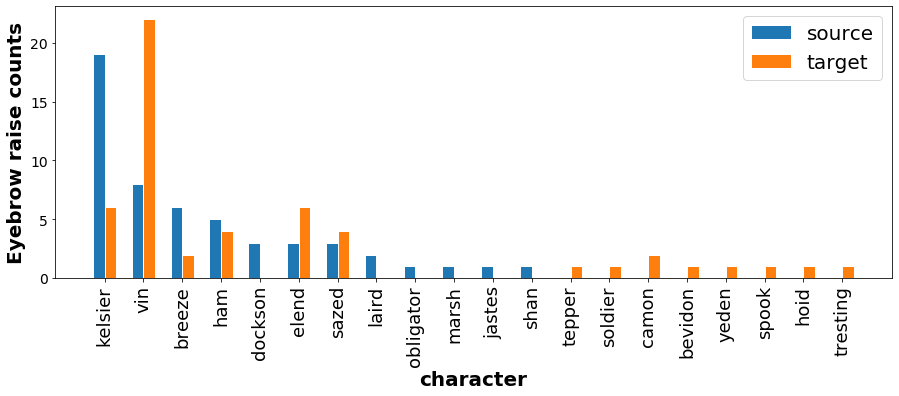

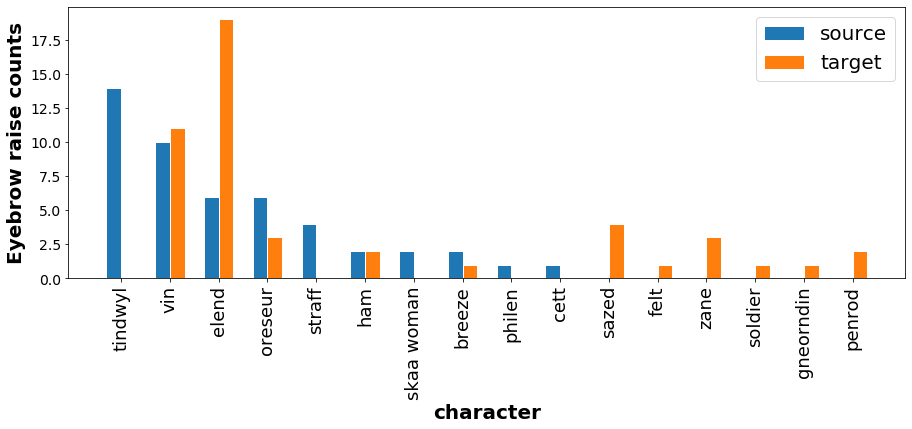

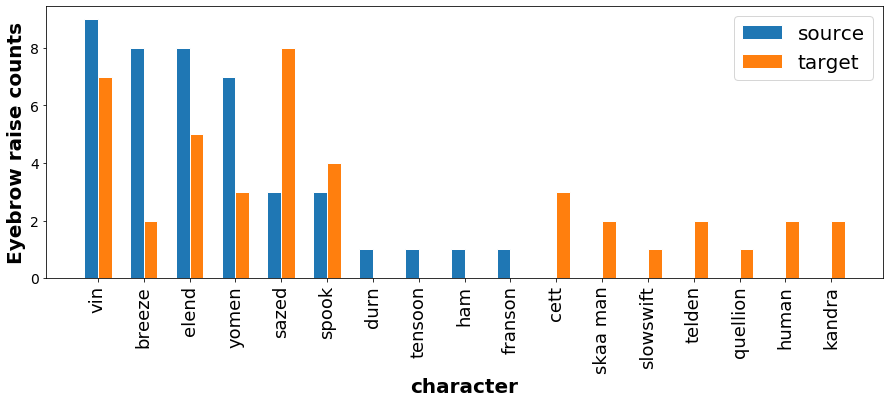

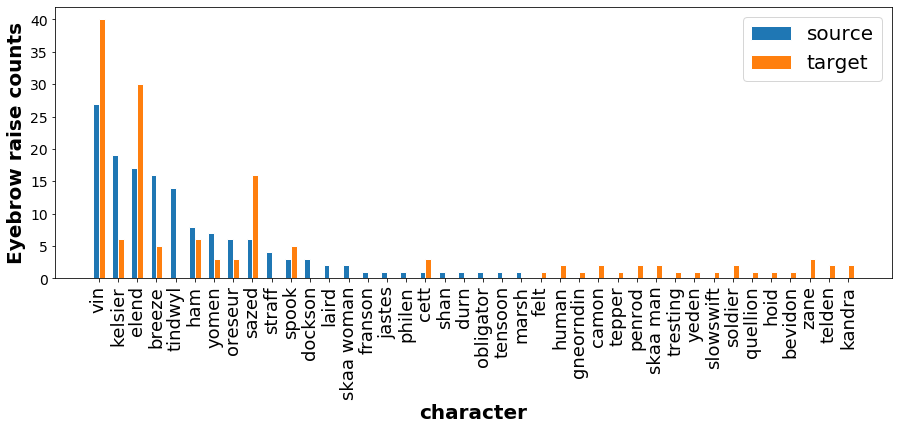

In [7]:
plot_raiser_raisee_counts(fe_raise_df)
plot_raiser_raisee_counts(wa_raise_df)
plot_raiser_raisee_counts(ha_raise_df)
plot_raiser_raisee_counts(mb_raise_df)

## Q2: How do characters' eyebrow interaction trends look over time?

In [8]:
# melt the df to have source/target as a column, 
def create_plot_df(df,custom_char_sort):
    '''
    Given a dataframe, melt and remerge it for plotting on a certain sort order
    '''
    # add index as a column
    df2 = df.assign(idx=df.index)
    # melt, use character_draw
    df_melt = df2.melt(id_vars=['idx'],
                       value_vars=['source','target'],
                       var_name = "eyebrow",       
                       value_name="character_draw")
    
    # merge melted df back to orignal source/target df
    df3 = df_melt.merge(df2,on='idx')
    # add a sort column on character draw
    df3["char_order"] = pd.Categorical(df3["character_draw"], categories=custom_char_sort)
    
    return df3



### Define swarm plot of eyebrow interactions

In [9]:
def eyebrow_swarm(df,main_chars):
    '''
    Given a dataframe, make a swarm plot of eyebrow interactions
    over time, per character
    '''
    plt.figure(figsize=(10,10))
    ax = sns.swarmplot(data=df,
                       x="page", 
                       y="character_draw",
                       hue='eyebrow',
                       order=main_chars,
                       size=8)

    ax.legend(title="Eyebrow",fontsize=14,bbox_to_anchor=(1.25, 1), ncol=1,title_fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Page Number",fontsize=16)
    plt.ylabel("")
    
    plt.show()

### Final Empire

In [10]:
fe_main_chars = ['kelsier','vin','elend','breeze','ham','sazed','dockson']

fe_char_sort = [
    'kelsier',
    'dockson',
    'breeze',
    'ham',
    'sazed',
    'marsh',
    'spook',
    'yeden',
    'vin',
    'hoid',
    'camon',
    'tepper',
    'soldier',
    'bevidon',
    'elend',
    'jastes',
    'shan',
    'laird',
    'obligator',
    'tresting',
]

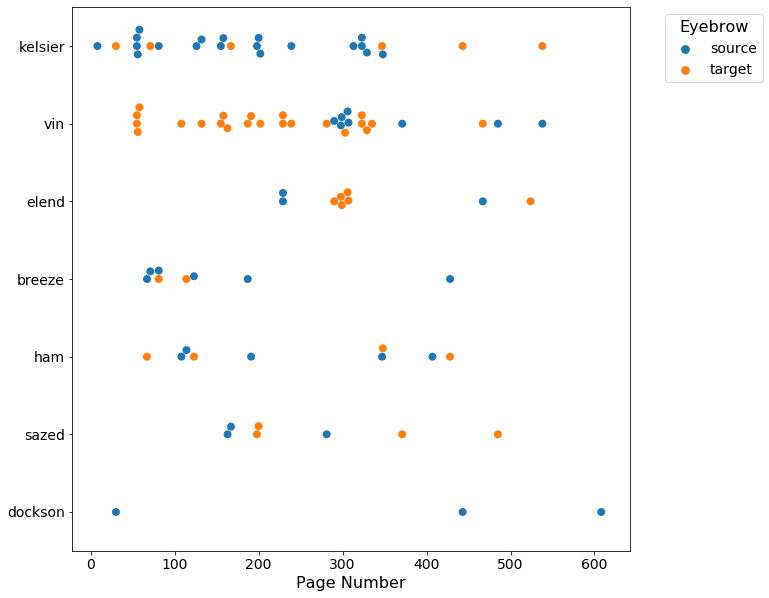

In [11]:
fe_plot_df = create_plot_df(fe,fe_char_sort)
eyebrow_swarm(fe_plot_df,fe_main_chars)

### Visualize eyebrow interactions with source-target connections

In [12]:
def plot_eyebrow_connections(df,fname):
    '''
    Given a df formatted for altair plotting, show the eyebrow 
    raiser/raisee interactions over time
    '''
    color_scheme = 'sinebow'
    char_order_df = df.sort_values('char_order')[['character_draw']].drop_duplicates()
    
    # base for points
    base = alt.Chart(df.sort_values('char_order')).mark_point(size=200).encode(
        x='page:Q',
        color=alt.Color('source:N',scale=alt.Scale(scheme=color_scheme),legend=None),
        y = alt.Y('character_draw:N',sort=None,axis=alt.Axis(title=None)),
        #shape = 'eyebrow:N',
        tooltip=['source:N','target:N','page:Q'],
        opacity = alt.value(0)
    )

    # source points (diamonds)
    raisers = base.mark_point(filled=True,shape='diamond',size=200).encode(
        x='page:Q',
        y = alt.Y('source:N',sort=None),
        tooltip=['source:N','target:N','page:Q'],
        opacity = alt.value(1),
    )

    # target points (circles)
    raisees = base.mark_point(size=200).encode(
        x='page:Q',
        y = alt.Y('target:N',sort=None),
        tooltip=['source:N','target:N','page:Q'],
        opacity = alt.value(1)
    )

    # vertical lines
    lines = alt.Chart(df.sort_values('char_order')).mark_rule().encode(
        x = 'page:Q',
        y = alt.Y('source:N',sort=None),
        y2 = alt.Y2('target:N'),
        color=alt.Color('source:N',scale=alt.Scale(scheme=color_scheme),legend=None),
        tooltip=['source:N','target:N','page:Q'],
        opacity = alt.value(0.25),
    )
    
    # horizontal background track
    track = alt.Chart(char_order_df).mark_rule().encode(
        y = alt.Y('character_draw:N',sort=None),
        #x = alt.X('target:N'),
        color=alt.Color('character_draw:N',scale=alt.Scale(scheme=color_scheme),legend=None),
        #tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(0.05),
        size=alt.value(15)
    )

    # put it all together and save
    chart =  track + base + raisers + raisees + lines 

    chart = chart.configure_axis(
        grid=False
    ).properties(
        height=500, 
        width=800
    ).configure_axis(
        labelFontSize=16,
        titleFontSize=16
    )
    chart.save(f"{fname}.html")
    return chart


In [13]:
plot_eyebrow_connections(fe_plot_df,'fe_eyebrow_conn')

alt.LayerChart(...)

In [14]:
def plot_eyebrow_connections_int(df,fname):
    '''
    Given a df formatted for altair plotting, show the eyebrow 
    raiser/raisee interactions over time. Interactive version
    '''
    color_scheme = 'sinebow'
    char_order_df = df.sort_values('char_order')[['character_draw']].drop_duplicates()
        
    # mouseover interaction
    highlight = alt.selection_multi(on='mouseover',fields=['character_draw'], nearest=True)
    
    # base for points
    base = alt.Chart(df.sort_values('char_order')).mark_point().encode(
        x='page:Q',
        color=alt.Color('source:N',scale=alt.Scale(scheme=color_scheme),legend=None),
        y = alt.Y('character_draw:N',sort=None,axis=alt.Axis(title=None)),
        tooltip=['source:N','target:N','page:Q'],
        opacity = alt.value(0)
    )

    # source points (diamonds)
    raisers = base.mark_point(filled=True,shape='diamond').encode(
        x='page:Q',
        y = alt.Y('source:N',sort=None),
        tooltip=['source:N','target:N','page:Q'],
        opacity = alt.value(1),
        size = alt.condition(highlight,alt.value(300),alt.value(100))
    )

    # target points (circles)
    raisees = base.mark_point().encode(
        x='page:Q',
        y = alt.Y('target:N',sort=None),
        tooltip=['source:N','target:N','page:Q'],
        opacity = alt.value(1),
        size = alt.condition(highlight,alt.value(200),alt.value(100)),
        strokeWidth=alt.StrokeWidthValue(1, condition=alt.StrokeWidthValue(3, selection=highlight.name))
    )
    
    # vertical lines
    lines = alt.Chart(df.sort_values('char_order')).mark_rule().encode(
        x = 'page:Q',
        y = alt.Y('source:N',sort=None),
        y2 = alt.Y2('target:N'),
        color=alt.Color('source:N',scale=alt.Scale(scheme=color_scheme),legend=None),
        tooltip=['source:N','target:N','page:Q'],
        opacity = alt.condition(highlight,alt.value(1),alt.value(0.15)),
        size=alt.condition(highlight,alt.value(3),alt.value(1))
    )
    
    # horizontal background track
    track = alt.Chart(char_order_df).mark_rule().encode(
        y = alt.Y('character_draw:N',sort=None),
        color=alt.Color('character_draw:N',scale=alt.Scale(scheme=color_scheme),legend=None),
        opacity = alt.condition(highlight,alt.value(0.25),alt.value(0.05)),
        size=alt.value(15)
    ).add_selection(highlight)
    
    
    # put it all together and save
    chart =  track + base + lines + raisers + raisees  

    chart = chart.configure_axis(
        grid=False
    ).properties(
        height=500, 
        width=800
    ).configure_axis(
        labelFontSize=16,
        titleFontSize=16
    )
    chart.save(f"{fname}.html")
    return chart

In [15]:
plot_eyebrow_connections_int(fe_plot_df,'fe_eyebrow_conn_int')

alt.LayerChart(...)

## Q3: What can we infer about the social dynamics that govern the established and developing relationships between characters based on their eyebrow exchanges?

### Visualize network diagram (prep for D3)

Add a little more metadata for visualizing the network in D3 and output as to json. See https://observablehq.com/d/ea523a627b98997b for actual network visualization.

In [16]:
# collect total eyebrow interactions per characters, output to Json for D3
fe4json = fe.groupby(['source','target']).size().reset_index().rename(columns={0:'count'})
fe4json.head()

,source,target,count
0,breeze,ham,3
1,breeze,kelsier,1
2,breeze,vin,1
3,breeze,yeden,1
4,dockson,kelsier,2


In [17]:
fe_links = fe4json.to_json(orient='records')

In [18]:
# Final Empire group designations
crew = ['kelsier','dockson','breeze','ham','sazed','vin','marsh','spook']
skaa = ['camon','yeden','tepper']
nobles = ['elend','jastes','shan','tresting']
steel = ['obligator','laird']

def get_fe_group(name):
    if name in crew:
        return 'crew'
    elif name in skaa:
        return 'skaa'
    elif name in nobles:
        return 'nobility'
    elif name in steel:
        return 'steel'
    else:
        return 'other'

color_dict = {
    'crew':'#a6d854', # green
    'skaa':'#fc8d62', # orange
    'nobility':'#beaed4', # purple
    'steel':'#80b1d3', # blue
    'other':'#b3b3b3' # gray
}

In [19]:
fe_interaction_counts = Counter(fe['source'].values.tolist() + fe['target'].values.tolist())
fe_nodes = pd.DataFrame.from_dict(fe_interaction_counts,orient='index').reset_index().rename(columns={'index':'name',0:'count'})
fe_nodes['group'] = fe_nodes['name'].apply(lambda x: get_fe_group(x))
fe_nodes['color'] = fe_nodes['group'].apply(lambda x: color_dict[x])
fe_nodes


,name,count,group,color
0,obligator,1,steel,#80b1d3
1,kelsier,25,crew,#a6d854
2,laird,2,steel,#80b1d3
3,dockson,3,crew,#a6d854
4,breeze,8,crew,#a6d854
5,ham,9,crew,#a6d854
6,sazed,7,crew,#a6d854
7,elend,9,nobility,#beaed4
8,vin,30,crew,#a6d854
9,shan,1,nobility,#beaed4


In [20]:
fe_nodes.to_json(orient='records')

'[{"name":"obligator","count":1,"group":"steel","color":"#80b1d3"},{"name":"kelsier","count":25,"group":"crew","color":"#a6d854"},{"name":"laird","count":2,"group":"steel","color":"#80b1d3"},{"name":"dockson","count":3,"group":"crew","color":"#a6d854"},{"name":"breeze","count":8,"group":"crew","color":"#a6d854"},{"name":"ham","count":9,"group":"crew","color":"#a6d854"},{"name":"sazed","count":7,"group":"crew","color":"#a6d854"},{"name":"elend","count":9,"group":"nobility","color":"#beaed4"},{"name":"vin","count":30,"group":"crew","color":"#a6d854"},{"name":"shan","count":1,"group":"nobility","color":"#beaed4"},{"name":"marsh","count":1,"group":"crew","color":"#a6d854"},{"name":"jastes","count":1,"group":"nobility","color":"#beaed4"},{"name":"tresting","count":1,"group":"nobility","color":"#beaed4"},{"name":"tepper","count":1,"group":"skaa","color":"#fc8d62"},{"name":"camon","count":2,"group":"skaa","color":"#fc8d62"},{"name":"yeden","count":1,"group":"skaa","color":"#fc8d62"},{"name":"

In [21]:
fe_links

'[{"source":"breeze","target":"ham","count":3},{"source":"breeze","target":"kelsier","count":1},{"source":"breeze","target":"vin","count":1},{"source":"breeze","target":"yeden","count":1},{"source":"dockson","target":"kelsier","count":2},{"source":"dockson","target":"soldier","count":1},{"source":"elend","target":"vin","count":3},{"source":"ham","target":"bevidon","count":1},{"source":"ham","target":"breeze","count":1},{"source":"ham","target":"kelsier","count":1},{"source":"ham","target":"vin","count":2},{"source":"jastes","target":"elend","count":1},{"source":"kelsier","target":"breeze","count":1},{"source":"kelsier","target":"ham","count":1},{"source":"kelsier","target":"hoid","count":1},{"source":"kelsier","target":"sazed","count":2},{"source":"kelsier","target":"spook","count":1},{"source":"kelsier","target":"tepper","count":1},{"source":"kelsier","target":"vin","count":12},{"source":"laird","target":"camon","count":2},{"source":"marsh","target":"vin","count":1},{"source":"obligat

# Repeat Analysis for books 2 and 3

### Well of Ascension

In [22]:
wa_main_chars = ['tindwyl','vin','elend','oreseur','breeze','ham','sazed','straff','zane']

wa_char_sort = [
    'vin',
    'elend',
    'oreseur',
    'tindwyl',
    'breeze',
    'ham',
    'sazed',
    'zane',
    'straff',
    'cett',
    'philen',
    'penrod',
    'gneorndin',
    'felt',
    'skaa woman',
    'solider'
]

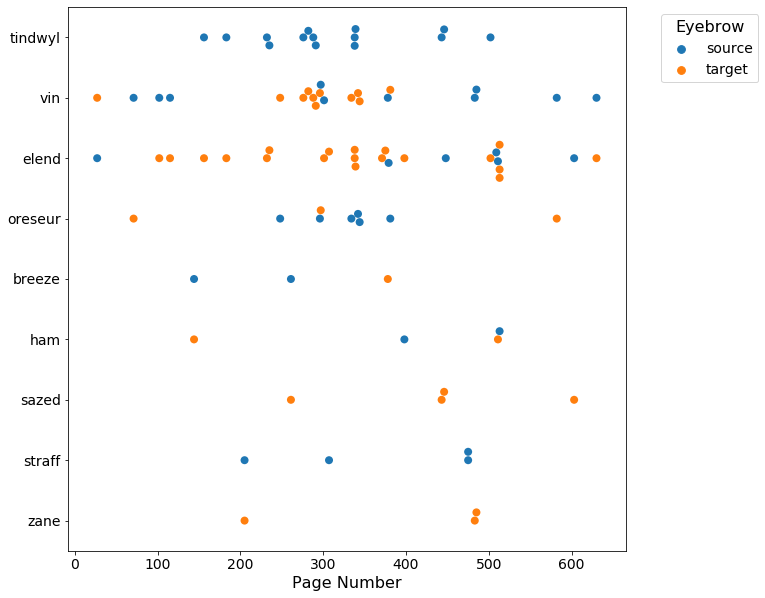

In [23]:
wa_plot_df = create_plot_df(wa,wa_char_sort)
eyebrow_swarm(wa_plot_df,wa_main_chars)

In [24]:
plot_eyebrow_connections(wa_plot_df,'wa_eyebrow_conn')

alt.LayerChart(...)

In [25]:
plot_eyebrow_connections_int(wa_plot_df,'wa_eyebrow_conn_int')

alt.LayerChart(...)

### Hero of Ages

In [26]:
ha_raise_df

,character,raiser,raisee
9,vin,9,7
16,breeze,8,2
7,elend,8,5
1,yomen,7,3
11,sazed,3,8
6,spook,3,4
15,durn,1,0
14,tensoon,1,0
8,ham,1,0
5,franson,1,0


In [27]:
ha_main_chars = ['vin','elend','breeze','ham','sazed','yomen','spook','cett']

ha_char_sort = [
    'vin',
    'elend',
    'sazed',
    'spook',
    'breeze',
    'ham',
    'yomen',
    'cett',
    'tensoon',
    'human',
    'slowswift',
    'franson',
    'durn',
    'telden',
    'quellion',
    'kandra',
    'skaa man',
    
]

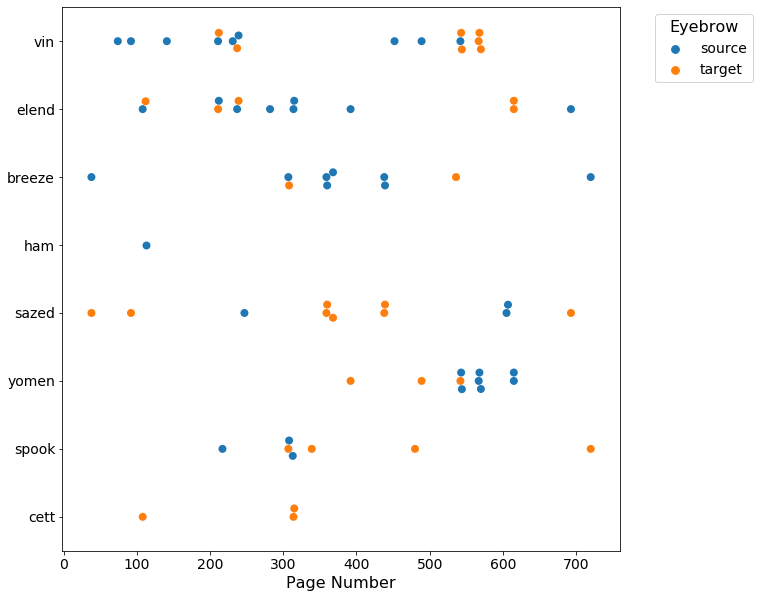

In [28]:
ha_plot_df = create_plot_df(ha,ha_char_sort)
eyebrow_swarm(ha_plot_df,ha_main_chars)

In [29]:
ha_plot_df

,idx,eyebrow,character_draw,page,source,target,book,char_order
0,101,source,breeze,38,breeze,sazed,3,breeze
1,101,target,sazed,38,breeze,sazed,3,sazed
2,102,source,vin,74,vin,human,3,vin
3,102,target,human,74,vin,human,3,human
4,103,source,vin,92,vin,sazed,3,vin
...,...,...,...,...,...,...,...,...
79,140,target,elend,615,yomen,elend,3,elend
80,141,source,elend,693,elend,sazed,3,elend
81,141,target,sazed,693,elend,sazed,3,sazed
82,142,source,breeze,720,breeze,spook,3,breeze


In [30]:
plot_eyebrow_connections(ha_plot_df,'ha_eyebrow_conn')

alt.LayerChart(...)

In [31]:
plot_eyebrow_connections_int(ha_plot_df,'ha_eyebrow_conn_int')

alt.LayerChart(...)

## Output for D3

### Well of Ascension

In [32]:
# collect total eyebrow interactions per characters, output to Json for D3
wa4json = wa.groupby(['source','target']).size().reset_index().rename(columns={0:'count'})
wa_links = wa4json.to_json(orient='records')

In [33]:
wa_raise_df

,character,raiser,raisee
9,tindwyl,14,0
10,vin,10,11
7,elend,6,19
14,oreseur,6,3
13,straff,4,0
8,ham,2,2
12,skaa woman,2,0
15,breeze,2,1
5,philen,1,0
11,cett,1,0


In [34]:
# Well of Ascension group designations
crew = ['dockson','breeze','ham','sazed','vin','spook']
support = ['oreseur','tindwyl']
skaa = ['skaa woman','philen','zane']
nobles = ['elend','cett','gneorndin','straff','penrod','felt']
#steel = ['obligator','laird']

def get_wa_group(name):
    if name in crew:
        return 'crew'
    elif name in skaa:
        return 'skaa'
    elif name in support:
        return 'support'
    elif name in nobles:
        return 'nobility'
    else:
        return 'other'

color_dict = {
    'crew':'#a6d854', # green
    'support':'#40BD73', # darker green
    'skaa':'#fc8d62', # orange
    'nobility':'#beaed4', # purple
    'steel':'#80b1d3', # blue
    'other':'#b3b3b3' # gray
}

wa_interaction_counts = Counter(wa['source'].values.tolist() + wa['target'].values.tolist())
wa_nodes = pd.DataFrame.from_dict(wa_interaction_counts,orient='index').reset_index().rename(columns={'index':'name',0:'count'})
wa_nodes['group'] = wa_nodes['name'].apply(lambda x: get_wa_group(x))
wa_nodes['color'] = wa_nodes['group'].apply(lambda x: color_dict[x])
wa_nodes


,name,count,group,color
0,elend,25,nobility,#beaed4
1,vin,21,crew,#a6d854
2,breeze,3,crew,#a6d854
3,tindwyl,14,support,#40BD73
4,straff,4,nobility,#beaed4
5,oreseur,9,support,#40BD73
6,philen,1,skaa,#fc8d62
7,cett,1,nobility,#beaed4
8,ham,4,crew,#a6d854
9,skaa woman,2,skaa,#fc8d62


In [35]:
wa_nodes.to_json(orient='records')

'[{"name":"elend","count":25,"group":"nobility","color":"#beaed4"},{"name":"vin","count":21,"group":"crew","color":"#a6d854"},{"name":"breeze","count":3,"group":"crew","color":"#a6d854"},{"name":"tindwyl","count":14,"group":"support","color":"#40BD73"},{"name":"straff","count":4,"group":"nobility","color":"#beaed4"},{"name":"oreseur","count":9,"group":"support","color":"#40BD73"},{"name":"philen","count":1,"group":"skaa","color":"#fc8d62"},{"name":"cett","count":1,"group":"nobility","color":"#beaed4"},{"name":"ham","count":4,"group":"crew","color":"#a6d854"},{"name":"skaa woman","count":2,"group":"skaa","color":"#fc8d62"},{"name":"zane","count":3,"group":"skaa","color":"#fc8d62"},{"name":"sazed","count":4,"group":"crew","color":"#a6d854"},{"name":"gneorndin","count":1,"group":"nobility","color":"#beaed4"},{"name":"soldier","count":1,"group":"other","color":"#b3b3b3"},{"name":"penrod","count":2,"group":"nobility","color":"#beaed4"},{"name":"felt","count":1,"group":"nobility","color":"#b

In [36]:
wa_links

'[{"source":"breeze","target":"ham","count":1},{"source":"breeze","target":"sazed","count":1},{"source":"cett","target":"elend","count":1},{"source":"elend","target":"felt","count":1},{"source":"elend","target":"gneorndin","count":1},{"source":"elend","target":"ham","count":1},{"source":"elend","target":"sazed","count":1},{"source":"elend","target":"soldier","count":1},{"source":"elend","target":"vin","count":1},{"source":"ham","target":"elend","count":2},{"source":"oreseur","target":"vin","count":6},{"source":"philen","target":"elend","count":1},{"source":"skaa woman","target":"elend","count":2},{"source":"straff","target":"elend","count":1},{"source":"straff","target":"penrod","count":2},{"source":"straff","target":"zane","count":1},{"source":"tindwyl","target":"elend","count":8},{"source":"tindwyl","target":"sazed","count":2},{"source":"tindwyl","target":"vin","count":4},{"source":"vin","target":"breeze","count":1},{"source":"vin","target":"elend","count":4},{"source":"vin","target"

### Hero of Ages

In [37]:
# collect total eyebrow interactions per characters, output to Json for D3
ha4json = ha.groupby(['source','target']).size().reset_index().rename(columns={0:'count'})
ha_links = ha4json.to_json(orient='records')

In [38]:
ha_raise_df

,character,raiser,raisee
9,vin,9,7
16,breeze,8,2
7,elend,8,5
1,yomen,7,3
11,sazed,3,8
6,spook,3,4
15,durn,1,0
14,tensoon,1,0
8,ham,1,0
5,franson,1,0


In [39]:
# Hero of Ages group designations
crew = ['breeze','ham','sazed','vin','spook']
kandra = ['tensoon','kandra']
koloss = ['human']
skaa = ['franson','durn','quellion','skaa man']
nobles = ['elend','cett','telden','slowswift']
steel = ['yomen']

def get_ha_group(name):
    if name in crew:
        return 'crew'
    elif name in skaa:
        return 'skaa'
    elif name in kandra:
        return 'kandra'
    elif name in koloss:
        return 'koloss'
    elif name in nobles:
        return 'nobility'
    elif name in steel:
        return 'steel'
    else:
        return 'other'

color_dict = {
    'crew':'#a6d854', # green
    'kandra':'#2EBBDC', # bluish
    'skaa':'#fc8d62', # orange
    'nobility':'#beaed4', # purple
    'steel':'#80b1d3', # blue
    'koloss':'#9EC9E1', # lightish blue
    'other':'#b3b3b3' # gray
}

ha_interaction_counts = Counter(ha['source'].values.tolist() + ha['target'].values.tolist())
ha_nodes = pd.DataFrame.from_dict(ha_interaction_counts,orient='index').reset_index().rename(columns={'index':'name',0:'count'})
ha_nodes['group'] = ha_nodes['name'].apply(lambda x: get_ha_group(x))
ha_nodes['color'] = ha_nodes['group'].apply(lambda x: color_dict[x])
ha_nodes


,name,count,group,color
0,breeze,10,crew,#a6d854
1,vin,16,crew,#a6d854
2,elend,13,nobility,#beaed4
3,ham,1,crew,#a6d854
4,spook,7,crew,#a6d854
5,sazed,11,crew,#a6d854
6,franson,1,skaa,#fc8d62
7,durn,1,skaa,#fc8d62
8,tensoon,1,kandra,#2EBBDC
9,yomen,10,steel,#80b1d3


In [40]:
ha_nodes.to_json(orient='records')

'[{"name":"breeze","count":10,"group":"crew","color":"#a6d854"},{"name":"vin","count":16,"group":"crew","color":"#a6d854"},{"name":"elend","count":13,"group":"nobility","color":"#beaed4"},{"name":"ham","count":1,"group":"crew","color":"#a6d854"},{"name":"spook","count":7,"group":"crew","color":"#a6d854"},{"name":"sazed","count":11,"group":"crew","color":"#a6d854"},{"name":"franson","count":1,"group":"skaa","color":"#fc8d62"},{"name":"durn","count":1,"group":"skaa","color":"#fc8d62"},{"name":"tensoon","count":1,"group":"kandra","color":"#2EBBDC"},{"name":"yomen","count":10,"group":"steel","color":"#80b1d3"},{"name":"human","count":2,"group":"koloss","color":"#9EC9E1"},{"name":"cett","count":3,"group":"nobility","color":"#beaed4"},{"name":"skaa man","count":2,"group":"skaa","color":"#fc8d62"},{"name":"slowswift","count":1,"group":"nobility","color":"#beaed4"},{"name":"quellion","count":1,"group":"skaa","color":"#fc8d62"},{"name":"telden","count":2,"group":"nobility","color":"#beaed4"},{"

In [41]:
ha_links

'[{"source":"breeze","target":"sazed","count":6},{"source":"breeze","target":"spook","count":2},{"source":"durn","target":"spook","count":1},{"source":"elend","target":"cett","count":3},{"source":"elend","target":"sazed","count":1},{"source":"elend","target":"telden","count":1},{"source":"elend","target":"vin","count":2},{"source":"elend","target":"yomen","count":1},{"source":"franson","target":"spook","count":1},{"source":"ham","target":"elend","count":1},{"source":"sazed","target":"kandra","count":2},{"source":"sazed","target":"quellion","count":1},{"source":"spook","target":"breeze","count":1},{"source":"spook","target":"skaa man","count":2},{"source":"tensoon","target":"breeze","count":1},{"source":"vin","target":"elend","count":2},{"source":"vin","target":"human","count":2},{"source":"vin","target":"sazed","count":1},{"source":"vin","target":"slowswift","count":1},{"source":"vin","target":"telden","count":1},{"source":"vin","target":"yomen","count":2},{"source":"yomen","target":"e

# Entire series

In [42]:
# collect total eyebrow interactions per characters, output to Json for D3
mb4json = df.groupby(['source','target']).size().reset_index().rename(columns={0:'count'})
mb_links = mb4json.to_json(orient='records')

In [43]:
# WHole series group designations
crew = ['kelsier','dockson','breeze','ham','sazed','vin','marsh','spook']
support = ['oreseur','tindwyl']
kandra = ['tensoon','kandra']
koloss = ['human']
skaa = ['franson','durn','quellion','skaa man','skaa woman','philen','zane','camon','yeden','tepper']
nobles = ['elend','cett','telden','slowswift','gneorndin','straff','penrod','felt','jastes','shan','tresting']
steel = ['yomen','obligator','laird']

def get_mb_group(name):
    if name in crew:
        return 'crew'
    elif name in skaa:
        return 'skaa'
    elif name in support:
        return 'support'
    elif name in kandra:
        return 'kandra'
    elif name in koloss:
        return 'koloss'
    elif name in nobles:
        return 'nobility'
    elif name in steel:
        return 'steel'
    else:
        return 'other'

color_dict = {
    'crew':'#a6d854', # green
    'kandra':'#2EBBDC', # bluish
    'support':'#40BD73', # darker green
    'skaa':'#fc8d62', # orange
    'nobility':'#beaed4', # purple
    'steel':'#80b1d3', # blue
    'koloss':'#9EC9E1', # lightish blue
    'other':'#b3b3b3' # gray
}

mb_interaction_counts = Counter(df['source'].values.tolist() + df['target'].values.tolist())
mb_nodes = pd.DataFrame.from_dict(mb_interaction_counts,orient='index').reset_index().rename(columns={'index':'name',0:'count'})
mb_nodes['group'] = mb_nodes['name'].apply(lambda x: get_mb_group(x))
mb_nodes['color'] = mb_nodes['group'].apply(lambda x: color_dict[x])
mb_nodes

,name,count,group,color
0,obligator,1,steel,#80b1d3
1,kelsier,25,crew,#a6d854
2,laird,2,steel,#80b1d3
3,dockson,3,crew,#a6d854
4,breeze,21,crew,#a6d854
5,ham,14,crew,#a6d854
6,sazed,22,crew,#a6d854
7,elend,47,nobility,#beaed4
8,vin,67,crew,#a6d854
9,shan,1,nobility,#beaed4


In [44]:
mb_nodes.to_json(orient='records')

'[{"name":"obligator","count":1,"group":"steel","color":"#80b1d3"},{"name":"kelsier","count":25,"group":"crew","color":"#a6d854"},{"name":"laird","count":2,"group":"steel","color":"#80b1d3"},{"name":"dockson","count":3,"group":"crew","color":"#a6d854"},{"name":"breeze","count":21,"group":"crew","color":"#a6d854"},{"name":"ham","count":14,"group":"crew","color":"#a6d854"},{"name":"sazed","count":22,"group":"crew","color":"#a6d854"},{"name":"elend","count":47,"group":"nobility","color":"#beaed4"},{"name":"vin","count":67,"group":"crew","color":"#a6d854"},{"name":"shan","count":1,"group":"nobility","color":"#beaed4"},{"name":"marsh","count":1,"group":"crew","color":"#a6d854"},{"name":"jastes","count":1,"group":"nobility","color":"#beaed4"},{"name":"tindwyl","count":14,"group":"support","color":"#40BD73"},{"name":"straff","count":4,"group":"nobility","color":"#beaed4"},{"name":"oreseur","count":9,"group":"support","color":"#40BD73"},{"name":"philen","count":1,"group":"skaa","color":"#fc8d6

In [45]:
mb_links

'[{"source":"breeze","target":"ham","count":4},{"source":"breeze","target":"kelsier","count":1},{"source":"breeze","target":"sazed","count":7},{"source":"breeze","target":"spook","count":2},{"source":"breeze","target":"vin","count":1},{"source":"breeze","target":"yeden","count":1},{"source":"cett","target":"elend","count":1},{"source":"dockson","target":"kelsier","count":2},{"source":"dockson","target":"soldier","count":1},{"source":"durn","target":"spook","count":1},{"source":"elend","target":"cett","count":3},{"source":"elend","target":"felt","count":1},{"source":"elend","target":"gneorndin","count":1},{"source":"elend","target":"ham","count":1},{"source":"elend","target":"sazed","count":2},{"source":"elend","target":"soldier","count":1},{"source":"elend","target":"telden","count":1},{"source":"elend","target":"vin","count":6},{"source":"elend","target":"yomen","count":1},{"source":"franson","target":"spook","count":1},{"source":"ham","target":"bevidon","count":1},{"source":"ham","ta